# Multilingual Experiments Results

Results using English Test set

In [1]:
# Experiment configuration
F1_SCORE_LABEL = 'F1-score'
PRAT_LABEL = 'RP@'
NDCGAT_LABEL = 'nDCG@'

TEST_SET_NAME = "German Test Set"
LANGUAGE = "de"
labelsCollection = "allLabels"
selectedMetrics = [F1_SCORE_LABEL, NDCGAT_LABEL + "5", PRAT_LABEL + "5"]

LMFT_cycles = 1
unfrozen_layers = None
classifier_FT_lang = "en"
GDUF="TRUE"

assert classifier_FT_lang in ["en", "en-de-fr", None]

In [2]:
import json
experimentsConfigurations = json.load(open("./configurations.json"))

In [3]:
def createNameFromConf(experiment):
    ret=[]
    if (experiment["GDUF"]=="True"):
        ret.append("GDUF")
    if experiment['LMFT_cycles']=='0':
        ret.append("NOLMFT")
    else:
        ret.append("LMFT"+experiment['LMFT_cycles'])
    ret.append("UNFREEZE"+experiment['unfrozen_layers'])
    
    return experiment['classifier_FT_lang'] + "/" +"-".join(ret)
for key, value in experimentsConfigurations.items():
    print(createNameFromConf(value))
    print(value)
    break

en/GDUF-NOLMFT-UNFREEZE6
{'id': '1', 'LMFT_cycles': '0', 'unfrozen_layers': '6', 'classifier_FT_lang': 'en', 'GDUF': 'True'}


In [4]:
#!/usr/bin/env python
# coding: utf-8

import sys
# insert at 1, 0 is the script path (or '' in REPL)

import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display 


MAX_K = 19
F1_SCORE_LABEL = 'F1-score'
PRAT_LABEL = 'RP@'
NDCGAT_LABEL = 'nDCG@'

EXPERIMENTS_PATH = Path('../results/')
RESULTS_FILENAME = 'results.csv'
COMPARISON_FIGURE_OUTPUT_NAME = "comparison.png"

# update results
CHOSEN_METRIC_LABELS = ['F1-score', 'RP@1', 'RP@3', 'RP@5', 'RP@10', 'nDCG@1', 'nDCG@3', 'nDCG@5', 'nDCG@10']
RESULTS_OUTPUT_METRICS_COL_NAMES = [F1_SCORE_LABEL] \
                                   + [PRAT_LABEL + str(k + 1) for k in range(MAX_K)] \
                                   + [NDCGAT_LABEL + str(k + 1) for k in range(MAX_K)]

## Constants for plotting results
MAX_K = 19
CYCLE_LABEL = 'Cycle'
Y_LABEL = 'score'
F1_SCORE_LABEL = 'F1-score'
PRAT_LABEL = 'RP@'
NDCGAT_LABEL = 'nDCG@'
SELECTED_K = [1, 3, 5, 10]
RESULTS_FILENAME = './results.csv'
F1_SCORE_FIGURE_SAVEFILE = 'F1-score.png'
PRATK_FIGURE_SAVEFILE = 'RP@k'
NDCGATK_FIGURE_SAVEFILE = 'nDCG@k'


In [5]:
def plotResults(saveDir, filepath, label, selectedMetric):
    Columns = [F1_SCORE_LABEL] \
              + [PRAT_LABEL + str(k + 1) for k in range(MAX_K)] \
              + [NDCGAT_LABEL + str(k + 1) for k in range(MAX_K)]

    data = pd.read_csv(filepath, names=Columns)
    data[CYCLE_LABEL] = [str(k + 1) for k in range(len(data))]
    data.set_index(CYCLE_LABEL)

    plt.plot(data[CYCLE_LABEL], data[selectedMetric], label=label)
    
#     plotFigures(data, y, savepath)

#     savepath = saveDir + "/" + PRATK_FIGURE_SAVEFILE
#     y = [PRAT_LABEL + str(k) for k in SELECTED_K]
#     plotFigures(data, y, savepath)

#     savepath = saveDir + "/" + NDCGATK_FIGURE_SAVEFILE
#     y = [NDCGAT_LABEL + str(k) for k in SELECTED_K]
#     plotFigures(data, y, savepath)

In [6]:
def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height/2),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',  rotation=90)
        
def plotBars(resultsDict, selectedcol, figureTitle):
    selectedMetrics = [0,3,7]
    chosedMetrics = [CHOSEN_METRIC_LABELS[index] for index in selectedMetrics]
    x = np.arange(len(chosedMetrics))  # the label locations
    width = 0.1  # the width of the bars

    xsticknames = [key for key in resultsDict.keys()]
    xsticknames.sort()
    
    plt.figure()
    for _idx, index in enumerate(selectedMetrics): 
        values=[]
        for key in xsticknames:
            values.append(resultsDict[key][index])
        plt.plot(values, label=chosedMetrics[_idx])
    plt.title(figureTitle)
    plt.xlabel(selectedcol)
    plt.xticks(np.arange(len(xsticknames)), xsticknames) 
    plt.grid()
    plt.legend()

        
def plotBars2(resultsDict, datasetName):
    selectedMetrics = [0,3,7]
    chosedMetrics = [CHOSEN_METRIC_LABELS[index] for index in selectedMetrics]
    x = np.arange(len(chosedMetrics))  # the label locations
    width = 0.1  # the width of the bars

    fig, ax = plt.subplots(figsize=(12, 6))
    for _idx, key in enumerate(resultsDict.keys()):
        rect = ax.bar(x + _idx * width, [resultsDict[key][index] for index in selectedMetrics], width, label=key)
        autolabel(rect, ax)
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_title(datasetName)
    ax.set_xticks(x)
    ax.set_xticklabels(chosedMetrics)
    ax.legend(bbox_to_anchor=(1.1, 1.05))
    fig.tight_layout()

    plt.show()
#     plt.savefig(savepath)

def plotBarsExperiment(selectedExperiments, comparison_metric, figureTitle):
    allResults={}
    # In[15]:
    lang='en'
    for experiment in selectedExperiments:
        label = createNameFromConf(experiment)
        experimentPath = experiment["path"]
        resultsPath = experimentPath / labelsCollection / RESULTS_FILENAME
        if resultsPath.is_file():
            data = pd.read_csv(resultsPath, names=RESULTS_OUTPUT_METRICS_COL_NAMES)
            singleResult = list(data.max().round(3)[CHOSEN_METRIC_LABELS])
            allResults[experiment[comparison_metric]] = singleResult
            print('experiment', comparison_metric, experiment[comparison_metric])
    plotBars(allResults, comparison_metric, figureTitle)

In [7]:
languages = os.listdir(EXPERIMENTS_PATH)
print(languages)

['en_de_fr', 'fr', 'de', 'en']


In [8]:
def listExperiments(lang, labelsCollection, needdisplay=True):
    allExperiments = []
    for datasetName in os.listdir(EXPERIMENTS_PATH / lang):
        if ((EXPERIMENTS_PATH / lang / datasetName).is_file()):
            continue
        for modelName in os.listdir(EXPERIMENTS_PATH / lang / datasetName):
            if ((EXPERIMENTS_PATH / lang / datasetName / modelName).is_file()):
                continue
            for experimentName in os.listdir(EXPERIMENTS_PATH / lang / datasetName / modelName):
                if ((EXPERIMENTS_PATH / lang/ datasetName / modelName / experimentName).is_file()):
                    continue
                experimentPath = EXPERIMENTS_PATH / lang / datasetName / modelName / experimentName
                experimentInfo = {
                    "path": experimentPath,
                    "name": experimentName, 
                    "modelName": modelName,
                    "datasetName": datasetName,
                    "lang": lang,
                    "labelsCollection": labelsCollection
                }
                experimentInfo.update(experimentsConfigurations[experimentName])
                allExperiments.append(experimentInfo)
    if needdisplay:
        display(pd.DataFrame(allExperiments))
    return allExperiments

def selectCollectionFromExperiments(lang, labelsCollection, LMFT_cycles, unfrozen_layers, classifier_FT_lang, GDUF):

    allExperiments=listExperiments(lang,labelsCollection, False)
    
    selectedExperiments = []

    for i, experiment in enumerate(allExperiments):
        if LMFT_cycles is not None and experiment["LMFT_cycles"] not in LMFT_cycles:
            continue
        if unfrozen_layers is not None and experiment["unfrozen_layers"] not in unfrozen_layers:
            continue
        if classifier_FT_lang is not None and experiment["classifier_FT_lang"] not in classifier_FT_lang:
            continue
        if GDUF is not None and experiment["GDUF"] not in GDUF:
            continue
        selectedExperiments.append(experiment)
    display(pd.DataFrame(selectedExperiments))
    return selectedExperiments

def plotSelectedMetrics(selectedExperiments, lang, labelsCollection, selectedMetric):
    fig = plt.figure()
    plt.title(selectedMetric)

    for experiment in selectedExperiments:
        label = createNameFromConf(experiment)
        experimentPath = experiment["path"]
        resultsPath = experimentPath / labelsCollection / RESULTS_FILENAME
        if resultsPath.is_file():
            plotResults(str(experimentPath), str(resultsPath), label, selectedMetric)
    plt.grid()
    plt.xlabel("cycle")
    plt.legend()

In [9]:
labelsCollection = "allLabels"

allExperiments=listExperiments(LANGUAGE,labelsCollection)

,path,name,modelName,datasetName,lang,labelsCollection,id,LMFT_cycles,unfrozen_layers,classifier_FT_lang,GDUF
0,../results/de/eurlex57K/distilbert/2LMFT,2LMFT,distilbert,eurlex57K,de,allLabels,17,-1,-1,-+-+en-de-fr,True
1,../results/de/eurlex57K/distilbert/5LMFT,5LMFT,distilbert,eurlex57K,de,allLabels,18,-1,-1,-+-+en-de-fr,True
2,../results/de/jrc_3langs/distilbert/1LMFTtrain...,1LMFTtrainen-unfreeze5,distilbert,jrc_3langs,de,allLabels,7,01,5,en,True
3,../results/de/jrc_3langs/distilbert/1LMFTtrain...,1LMFTtrainen-NOGDUF-UNFREEZE6,distilbert,jrc_3langs,de,allLabels,8,01,6,en,False
4,../results/de/jrc_3langs/distilbert/NOLMFTtrainen,NOLMFTtrainen,distilbert,jrc_3langs,de,allLabels,1,0,6,en,True
5,../results/de/jrc_3langs/distilbert/1LMFTtrain...,1LMFTtrainen-unfreezeAll,distilbert,jrc_3langs,de,allLabels,9,01,all,en,True
6,../results/de/jrc_3langs/distilbert/1LMFTtrain...,1LMFTtrain3langs,distilbert,jrc_3langs,de,allLabels,10,01,6,en-de-fr,True
7,../results/de/jrc_3langs/distilbert/NOLMFTtrai...,NOLMFTtrain3langs,distilbert,jrc_3langs,de,allLabels,2,0,6,en-de-fr,True
8,../results/de/jrc_3langs/distilbert/1LMFTtrain...,1LMFTtrainen-unfreeze4,distilbert,jrc_3langs,de,allLabels,6,01,4,en,True
9,../results/de/jrc_3langs/distilbert/5LMFTtrainen,5LMFTtrainen,distilbert,jrc_3langs,de,allLabels,13,05,6,en,True


W/O GDUF

,path,name,modelName,datasetName,lang,labelsCollection,id,LMFT_cycles,unfrozen_layers,classifier_FT_lang,GDUF
0,../results/de/jrc_3langs/distilbert/1LMFTtrain...,1LMFTtrainen-NOGDUF-UNFREEZE6,distilbert,jrc_3langs,de,allLabels,8,01,6,en,False
1,../results/de/jrc_3langs/distilbert/1LMFTtrainen,1LMFTtrainen,distilbert,jrc_3langs,de,allLabels,3,01,6,en,True


experiment GDUF False
experiment GDUF True


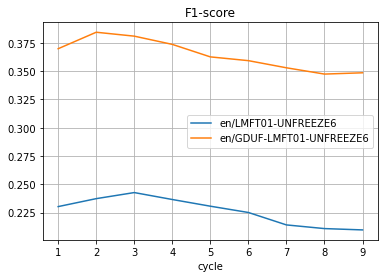

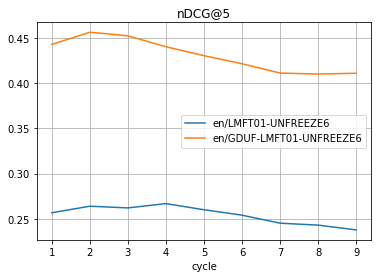

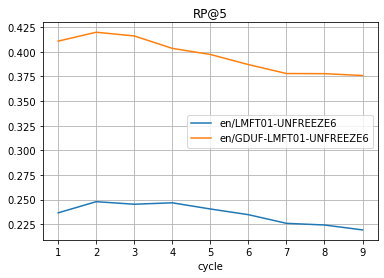

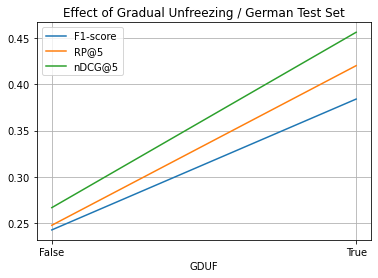

In [10]:
LMFT_cycles = ["01"]
unfrozen_layers = ["6"]
classifier_FT_lang = ["en"]
comparison_metric = "GDUF"
GDUF=None

selectedExperiments = selectCollectionFromExperiments(
    LANGUAGE, labelsCollection, LMFT_cycles, unfrozen_layers, classifier_FT_lang, GDUF)

# update results
for selectedMetric in selectedMetrics:
    plotSelectedMetrics(selectedExperiments, LANGUAGE, labelsCollection, selectedMetric)
plotBarsExperiment(selectedExperiments, comparison_metric, "Effect of Gradual Unfreezing / "+ TEST_SET_NAME)

## Effect of more LM-finetuning cycles

Classifier FT using English only

,path,name,modelName,datasetName,lang,labelsCollection,id,LMFT_cycles,unfrozen_layers,classifier_FT_lang,GDUF
0,../results/de/jrc_3langs/distilbert/NOLMFTtrainen,NOLMFTtrainen,distilbert,jrc_3langs,de,allLabels,1,0,6,en,True
1,../results/de/jrc_3langs/distilbert/5LMFTtrainen,5LMFTtrainen,distilbert,jrc_3langs,de,allLabels,13,05,6,en,True
2,../results/de/jrc_3langs/distilbert/10LMFTtrainen,10LMFTtrainen,distilbert,jrc_3langs,de,allLabels,5,10,6,en,True
3,../results/de/jrc_3langs/distilbert/1LMFTtrainen,1LMFTtrainen,distilbert,jrc_3langs,de,allLabels,3,01,6,en,True


experiment LMFT_cycles 0
experiment LMFT_cycles 05
experiment LMFT_cycles 10
experiment LMFT_cycles 01


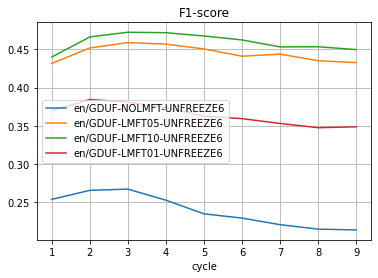

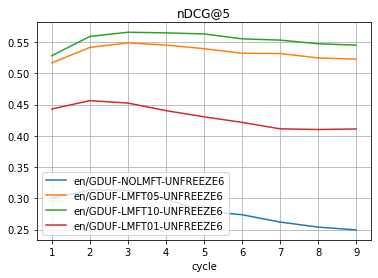

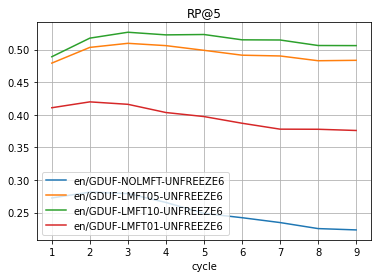

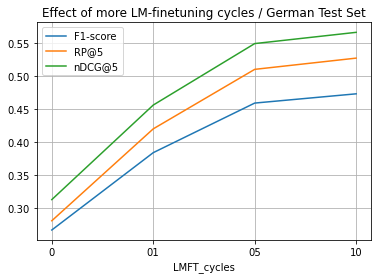

In [11]:
LMFT_cycles = ["01","0", "05","10"]
unfrozen_layers = ["6"]
classifier_FT_lang = ["en"]
GDUF=['True']
comparison_metric = "LMFT_cycles"


selectedExperiments = selectCollectionFromExperiments(
    LANGUAGE, labelsCollection, LMFT_cycles, unfrozen_layers, classifier_FT_lang, GDUF)

# update results
for selectedMetric in selectedMetrics:
    plotSelectedMetrics(selectedExperiments, LANGUAGE, labelsCollection, selectedMetric)
plotBarsExperiment(selectedExperiments, comparison_metric, "Effect of more LM-finetuning cycles / "+ TEST_SET_NAME)

## Effect of using unfreezing more layers

## Compare Different configurations when we pretrain LM for only one epoch

Finetune LM for one iteration, and finetune classifier using English Data Only.

,path,name,modelName,datasetName,lang,labelsCollection,id,LMFT_cycles,unfrozen_layers,classifier_FT_lang,GDUF
0,../results/de/jrc_3langs/distilbert/1LMFTtrain...,1LMFTtrainen-unfreeze5,distilbert,jrc_3langs,de,allLabels,7,01,5,en,True
1,../results/de/jrc_3langs/distilbert/1LMFTtrain...,1LMFTtrainen-unfreezeAll,distilbert,jrc_3langs,de,allLabels,9,01,all,en,True
2,../results/de/jrc_3langs/distilbert/1LMFTtrain...,1LMFTtrainen-unfreeze4,distilbert,jrc_3langs,de,allLabels,6,01,4,en,True
3,../results/de/jrc_3langs/distilbert/1LMFTtrain...,1LMFTtrainen-unfreeze3,distilbert,jrc_3langs,de,allLabels,5,01,3,en,True
4,../results/de/jrc_3langs/distilbert/1LMFTtrain...,1LMFTtrainen-unfreeze2,distilbert,jrc_3langs,de,allLabels,4,01,2,en,True
5,../results/de/jrc_3langs/distilbert/1LMFTtrainen,1LMFTtrainen,distilbert,jrc_3langs,de,allLabels,3,01,6,en,True


experiment unfrozen_layers 5
experiment unfrozen_layers all
experiment unfrozen_layers 4
experiment unfrozen_layers 3
experiment unfrozen_layers 2
experiment unfrozen_layers 6


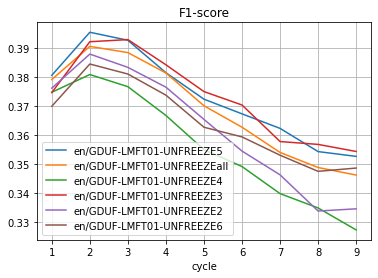

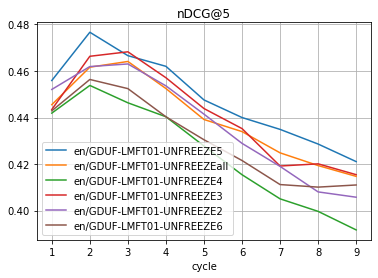

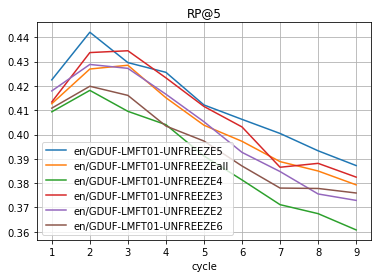

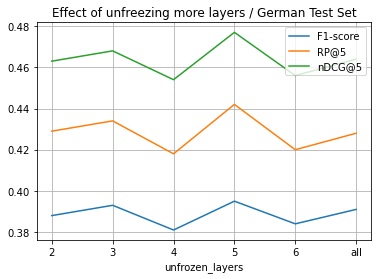

In [12]:
LMFT_cycles = ["01"]
unfrozen_layers = None
classifier_FT_lang = ["en"]
GDUF=['True']
comparison_metric = "unfrozen_layers"

selectedExperiments = selectCollectionFromExperiments(LANGUAGE, labelsCollection, LMFT_cycles, unfrozen_layers, classifier_FT_lang, GDUF)

# update results
for selectedMetric in selectedMetrics:
    plotSelectedMetrics(selectedExperiments, LANGUAGE, labelsCollection, selectedMetric)
plotBarsExperiment(selectedExperiments, comparison_metric, "Effect of unfreezing more layers / "+ TEST_SET_NAME)

## Effect of using more parallel data

,path,name,modelName,datasetName,lang,labelsCollection,id,LMFT_cycles,unfrozen_layers,classifier_FT_lang,GDUF
0,../results/de/jrc_3langs/distilbert/10LMFTtrainen,10LMFTtrainen,distilbert,jrc_3langs,de,allLabels,5,10,6,en,True
1,../results/de/jrc_3langs/distilbert/10LMFTtrai...,10LMFTtrain3langs,distilbert,jrc_3langs,de,allLabels,16,10,6,en-de-fr,True


experiment classifier_FT_lang en
experiment classifier_FT_lang en-de-fr


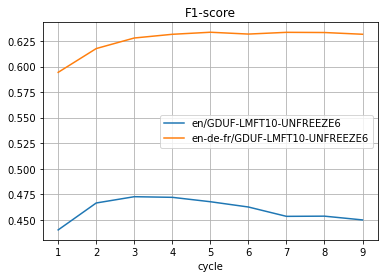

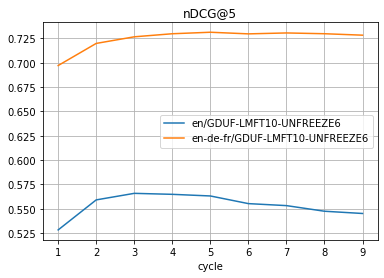

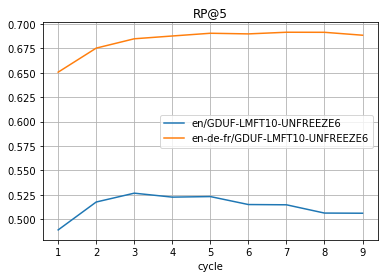

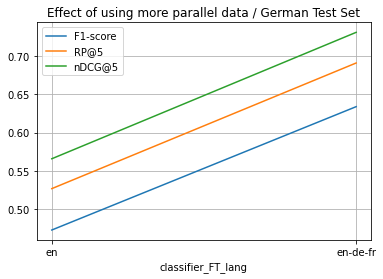

In [13]:
LMFT_cycles = ["10"]
unfrozen_layers = ["6"]
classifier_FT_lang = ["en","en-de-fr"]
GDUF=['True']
comparison_metric = "classifier_FT_lang"

selectedExperiments = selectCollectionFromExperiments(LANGUAGE, labelsCollection, LMFT_cycles, unfrozen_layers, classifier_FT_lang, GDUF)

# update results
for selectedMetric in selectedMetrics:
    plotSelectedMetrics(selectedExperiments, LANGUAGE, labelsCollection, selectedMetric)
    
plotBarsExperiment(selectedExperiments, comparison_metric, "Effect of using more parallel data / " + TEST_SET_NAME)